In [49]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df = pd.read_csv("shopping_trends.csv")

In [51]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


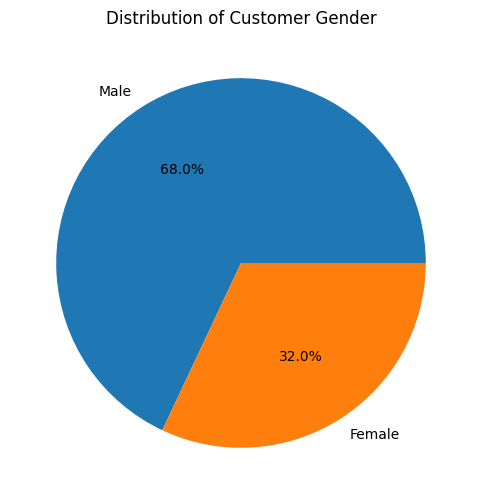

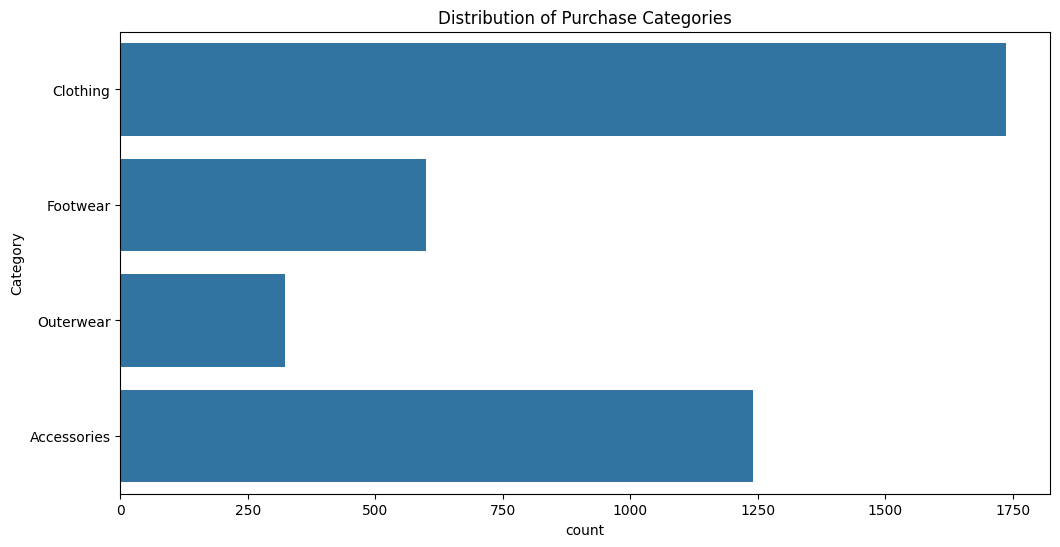

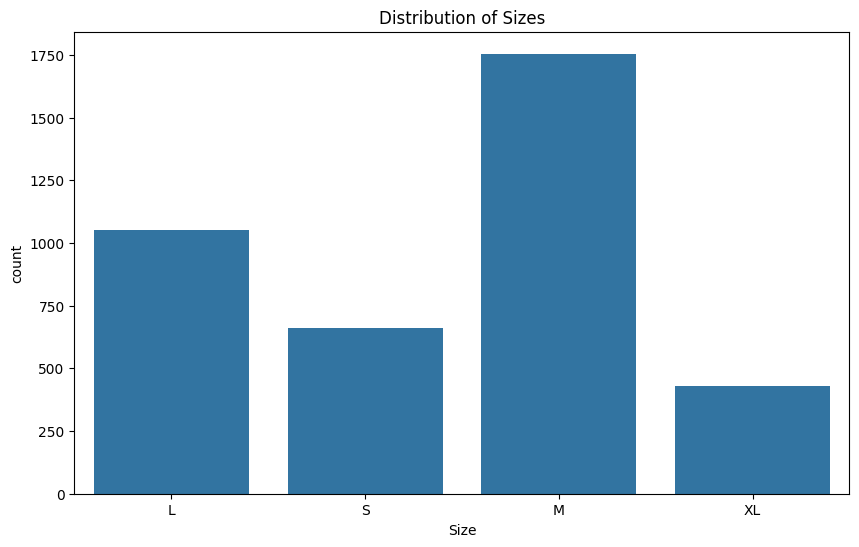

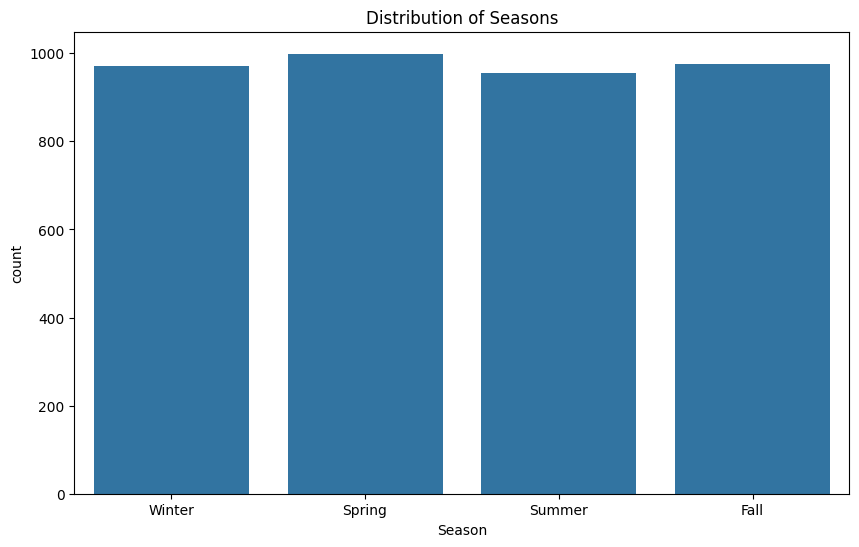

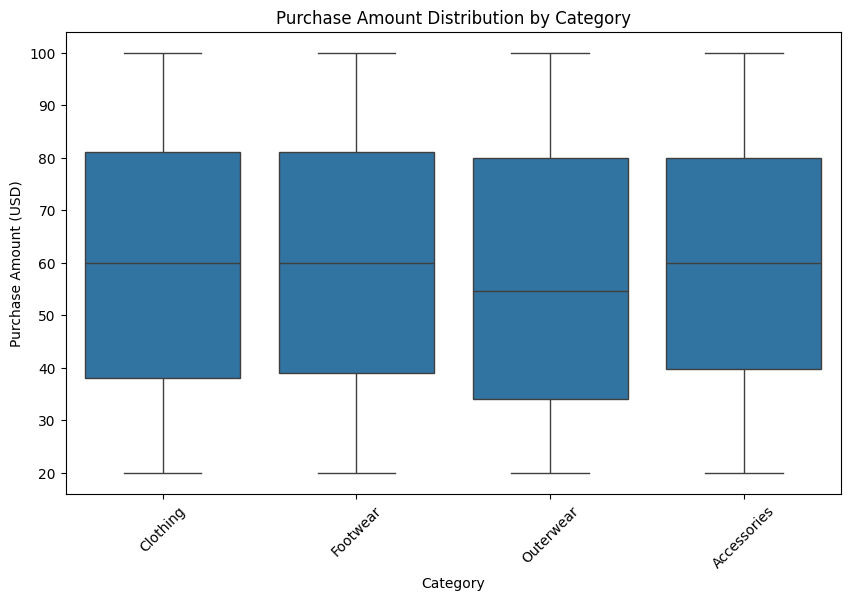

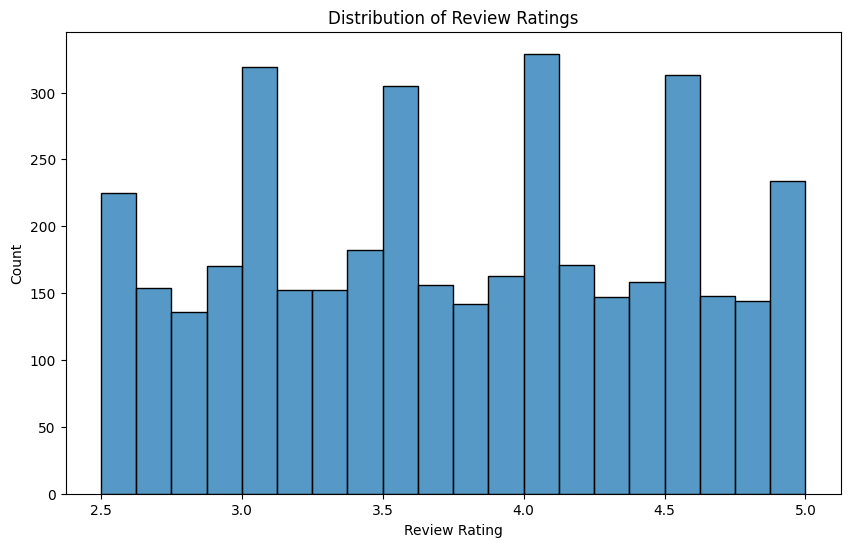

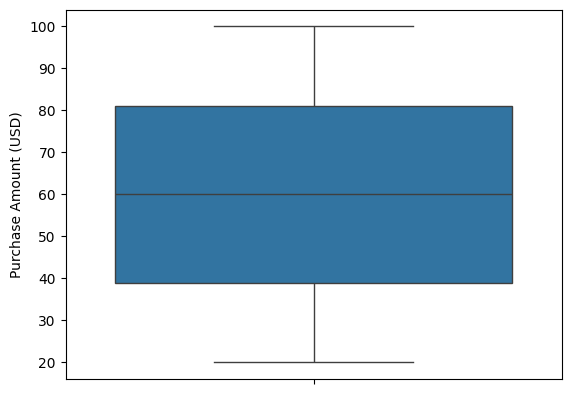

In [52]:
plt.figure(figsize=(10, 6))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Customer Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Category')
plt.title('Distribution of Purchase Categories')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Size')
plt.title('Distribution of Sizes')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season')
plt.title('Distribution of Seasons')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.title('Purchase Amount Distribution by Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Review Rating', bins=20)
plt.title('Distribution of Review Ratings')
plt.show()


sns.boxplot(df["Purchase Amount (USD)"])
plt.show()

In [53]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

categorical_features = ["Gender", "Item Purchased", "Category", "Size", "Season", 
                       "Color", "Location", "Payment Method", "Shipping Type", 
                       "Discount Applied", "Promo Code Used", "Preferred Payment Method", 
                       "Frequency of Purchases"]

numerical_features = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]

le = LabelEncoder()
y = le.fit_transform(df['Subscription Status'])

ohc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded = ohc.fit_transform(df[categorical_features])
categorical_encoded_df = pd.DataFrame(
    categorical_encoded,
    columns=ohc.get_feature_names_out(categorical_features)
)

scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_features])
numerical_scaled_df = pd.DataFrame(
    numerical_scaled,
    columns=numerical_features
)

X = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)


reshaped_y = y.reshape(-1, 1)



AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, reshaped_y, test_size=0.2, random_state=42)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import auc, roc_curve, roc_auc_score


knn = KNeighborsClassifier(n_neighbors=5, )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC:", auc)
print("AUC Score:", roc_auc_score(y_test, y_pred))








Accuracy: 0.8076923076923077
AUC: 0.7896444831928702
AUC Score: 0.7896444831928702


/Users/dam_kamani/Downloads/machine-learning_zero-to-hero/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, )

grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
print("Best Estimator: ", grid_search.best_estimator_)
print("Best Index: ", grid_search.best_index_)


    

/Users/dam_kamani/Downloads/machine-learning_zero-to-hero/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/dam_kamani/Downloads/machine-learning_zero-to-hero/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/dam_kamani/Downloads/machine-learning_zero-to-hero/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/dam_kamani/Downloads/machine-learning_zero-to-he

Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}
Best Score:  0.8301282051282051
Best Estimator:  KNeighborsClassifier(metric='euclidean', n_neighbors=14, weights='distance')
Best Index:  23


/Users/dam_kamani/Downloads/machine-learning_zero-to-hero/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
